In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Import the data for analysis
df=pd.read_csv("downloads/flights.csv")

In [2]:
#To read the first 5 elements of the data
df.head(5)
#to Know the sum of total null values
df.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [3]:
#Filling all null values in the departure delay section with the mean values 
df["DepDel15"]=df["DepDel15"].fillna(df["DepDel15"].mean())

In [4]:
#Check the number of null values
df["DepDel15"].isnull().sum()

0

DepDelay 
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



C:\Users\HP\AppData\Local\Temp/ipykernel_13220/2947247570.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ArrDelay 
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



C:\Users\HP\AppData\Local\Temp/ipykernel_13220/2947247570.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


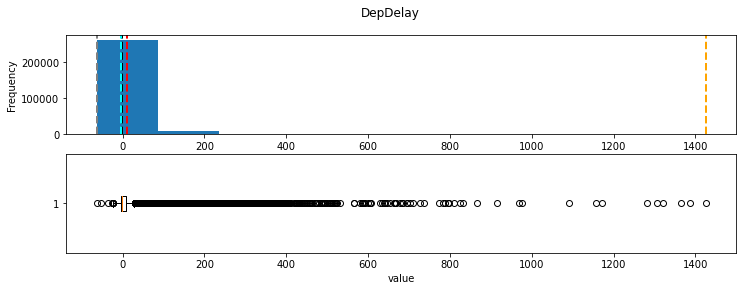

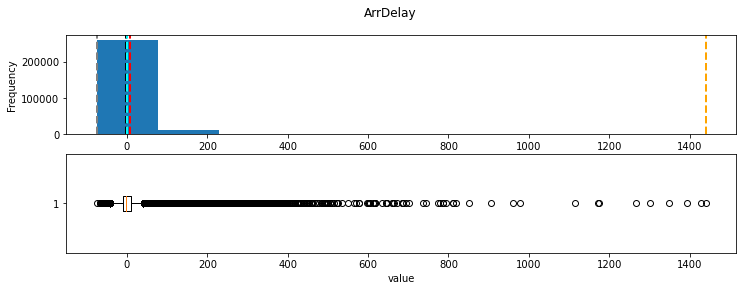

In [5]:
# to shpw the distribution
def show_distribution(var_data):
    import matplotlib.pyplot as plt
    #statistics of data
    mean_value=var_data.mean()
    mode_value=var_data.mode()[0]
    min_value=var_data.min()
    max_value=var_data.max()
    median_value=var_data.median()
    print(var_data.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_value,
                                                                                            mean_value,
                                                                                            median_value,
                                                                                            mode_value,
                                                                                            max_value)) 
    #To visualize our data              
    fig,ax=plt.subplots(2,1,figsize=(12,4))
        #To plot an histogram
    ax[0].hist(var_data) 
    ax[0].set_ylabel("Frequency")     
    #To add vertical line accross distinct statistics value of data
    ax[0].axvline(x=min_value, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_value,color='orange',linestyle='dashed', linewidth=2)  
    ax[0].axvline(x=mean_value,color='red',linestyle='dashed', linewidth= 2) 
    ax[0].axvline(x=median_value,color='black',linestyle='dashed',linewidth= 2)
    ax[0].axvline(x=mode_value,color='cyan',linestyle='dashed',linewidth= 2 )                                                                                                              
      #Horizontal Blox plot    
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel("value")
    #To add a title to the plot
    fig.suptitle(var_data.name)
    #Show figure
    fig.show()

#To check the statistics of each delay field
delay_field=['DepDelay',"ArrDelay"]
for col in delay_field:
    show_distribution(df[col])

    

DepDelay 
Minimum:-9.00
Mean:-3.40
Median:-3.00
Mode:-3.00
Maximum:1.00



C:\Users\HP\AppData\Local\Temp/ipykernel_13220/2947247570.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ArrDelay 
Minimum:-23.00
Mean:-9.51
Median:-9.00
Mode:0.00
Maximum:1.00



C:\Users\HP\AppData\Local\Temp/ipykernel_13220/2947247570.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


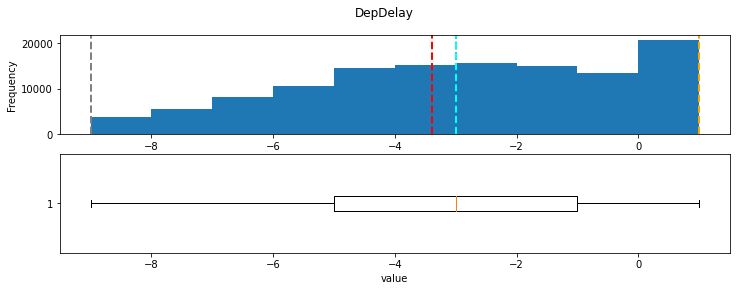

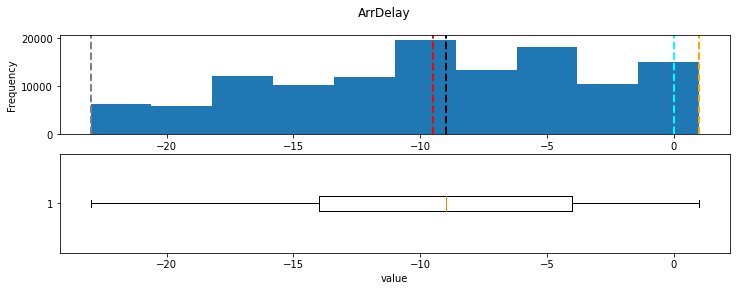

In [10]:
#Trim the outliers with determining the 1st and 90th percentile
ArrDelay_1Percentile=df.ArrDelay.quantile(0.01)
ArrDelay_90Percentile=df.ArrDelay.quantile(0.9)
df= df[df.ArrDelay < ArrDelay_90Percentile]
df=df[df.ArrDelay > ArrDelay_1Percentile]

#For DepDelay
DepDelay_1Percentile=df.DepDelay.quantile(0.01)
DepDelay_90Percentile=df.DepDelay.quantile(0.9)
df= df[df.DepDelay < DepDelay_90Percentile]
df=df[df.DepDelay > DepDelay_1Percentile]
for col in delay_field:
    show_distribution(df[col])

In [11]:
#Exploring the data 
df.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,122821.0,122821.000000,122821.000000,122821.000000,122821.000000,122821.000000,122821.000000,122821.000000,122821.000000,122821.000000,122821.000000,122821.000000,122821.000000
mean,2013.0,7.042875,15.780412,3.898397,12764.935817,12708.433126,1239.396781,-3.395413,0.004521,1419.418935,-9.508659,0.022895,0.022895
std,0.0,2.023072,8.889945,2.004552,1522.036147,1513.952621,472.327819,2.634040,0.029816,483.114314,6.317012,0.149570,0.149570
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-9.000000,0.000000,1.000000,-23.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,830.000000,-5.000000,0.000000,1028.000000,-14.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1200.000000,-3.000000,0.000000,1403.000000,-9.000000,0.000000,0.000000
75%,2013.0,9.000000,24.000000,6.000000,14100.000000,14057.000000,1625.000000,-1.000000,0.000000,1819.000000,-4.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1.000000,0.201134,2359.000000,1.000000,1.000000,1.000000


In [12]:
#mean flight arrival and departure delay
df[delay_field].mean()

DepDelay   -3.395413
ArrDelay   -9.508659
dtype: float64

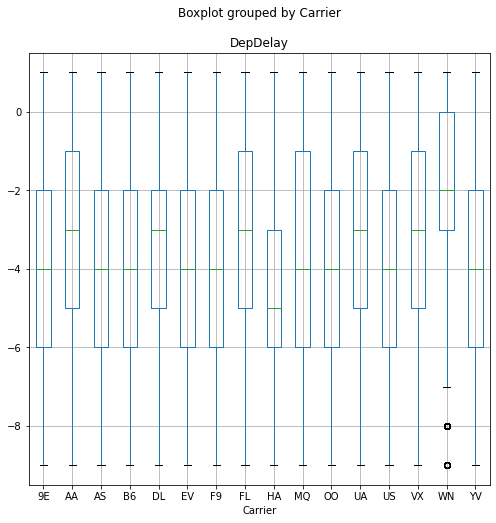

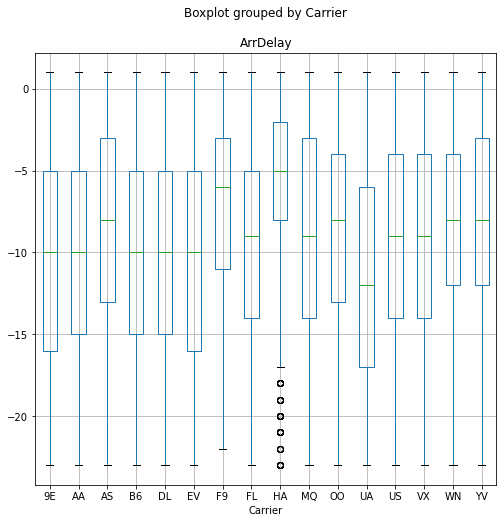

In [14]:
#Comparing the flight carriers to delay performance
for col in delay_field:
    df.boxplot(column=col,by="Carrier",figsize=(8,8))

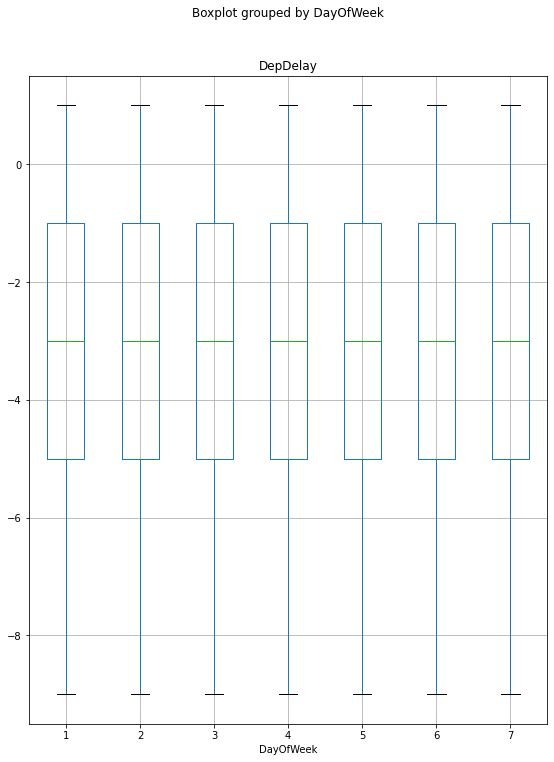

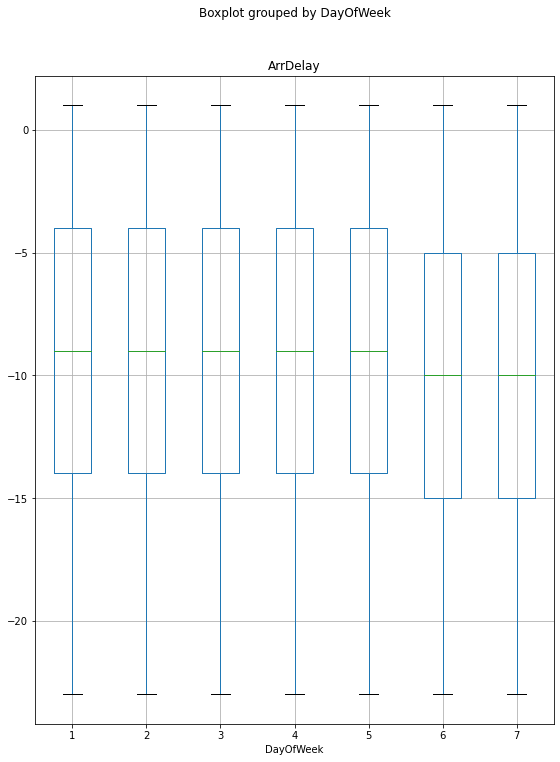

In [17]:
#Comparing days of the week to delay performance
for col in delay_field:
    df.boxplot(column=col,by="DayOfWeek",figsize=(9,12))

<AxesSubplot:xlabel='OriginAirportName'>

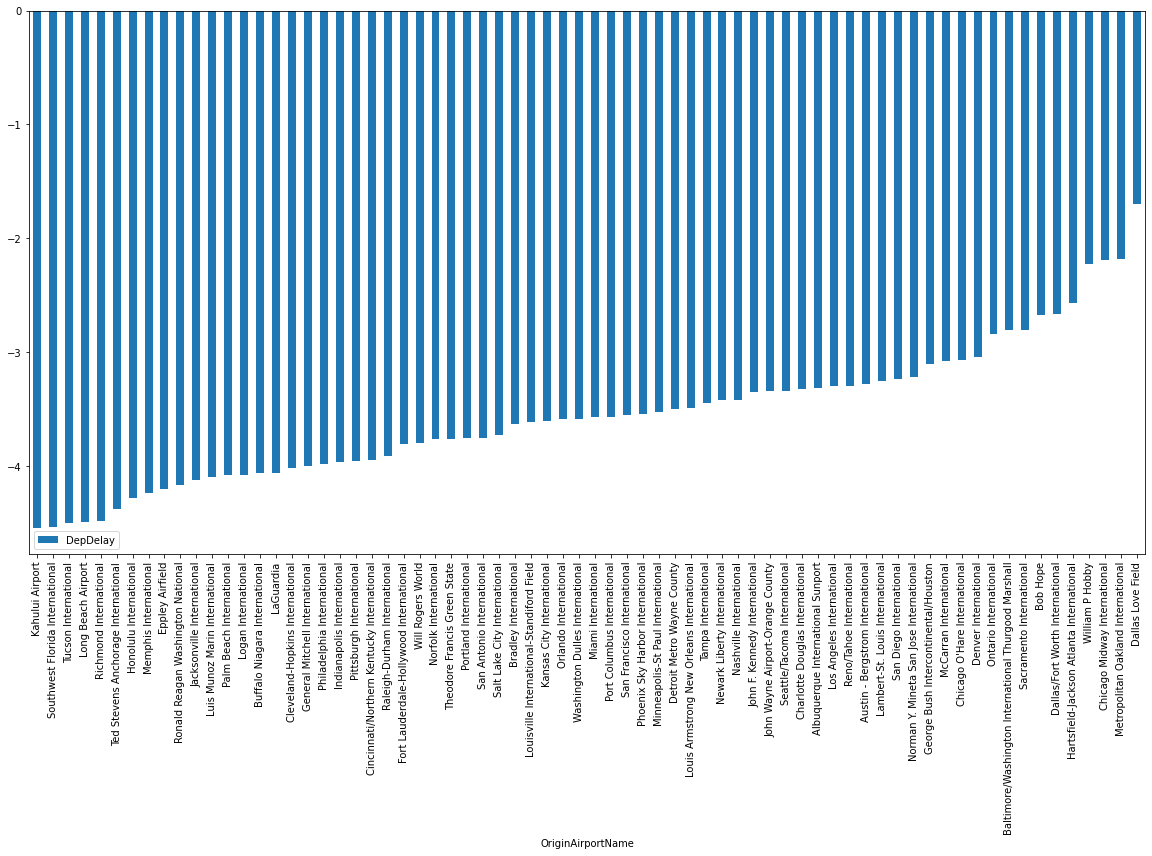

In [23]:
#Which airport has the highest departure time
departure_airport_group =df.groupby(df.OriginAirportName)
mean_departure_delays = pd.DataFrame(departure_airport_group['DepDelay'].mean()).sort_values('DepDelay')
mean_departure_delays.plot(kind="bar",figsize=(20,10))

In [29]:
# Add a routes column
routes  = pd.Series(df['OriginAirportName'] + ' > ' + df['DestAirportName'])
df = pd.concat([df, routes.rename("Route")], axis=1)

# Group by routes
route_group = df.groupby(df.Route)
pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
San Francisco International > Los Angeles International,44
Los Angeles International > San Francisco International,33
LaGuardia > Logan International,22
LaGuardia > Chicago O'Hare International,21
Detroit Metro Wayne County > Chicago O'Hare International,20
...,...
Lambert-St. Louis International > San Diego International,0
Lambert-St. Louis International > San Antonio International,0
Lambert-St. Louis International > Salt Lake City International,0
